In [3]:
from IPython.display import display
import pyautogui
from PIL import ImageOps
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntRangeSlider
import time
import os
import pytesseract
from glob import glob

%matplotlib inline

In [5]:
#%config InlineBackend.figure_format = 'retina'

In [4]:
def makeRangeSlider(max_n):
    # 範囲のスライダーを作る。2f%で計算しても良さそうだったけど、細かいところまで弄れるように画素単位にした。
    return IntRangeSlider(
    value=[0., max_n],
    min=0., max= max_n-1, step=1,
    description='xlim:',
    readout_format='.1d',
)

In [5]:
def cropImage(heightRange, widthRange):
    plt.figure(figsize=(20, 20))
    plt.imshow(capture_array[heightRange[0]:heightRange[1], widthRange[0]:widthRange[1]])

In [ ]:
39,1414
994-1966

In [7]:
time.sleep(5)
screen_capture = pyautogui.screenshot()
capture_array = np.asarray(screen_capture)
height, width = capture_array.shape[0], capture_array.shape[1]
time.sleep(10)
interact(cropImage, heightRange = makeRangeSlider(height), widthRange = makeRangeSlider(width))

interactive(children=(IntRangeSlider(value=(0, 1439), description='xlim:', max=1439, readout_format='.1d'), In…

<function __main__.cropImage(heightRange, widthRange)>

In [24]:
page_region=(994,39, 1966-994, 1414-39)

In [32]:
page_count = 240
time.sleep(4)
for i in range(page_count):
    name = './stock/test{}.png'.format(str(i).zfill(4))
    pyautogui.screenshot(name, region=page_region)
    #time.sleep(0.01)
    pyautogui.press('right')
    #time.sleep(0.01)

In [23]:
!mkdir stock

In [31]:
!rm stock/*

rm: cannot remove 'stock/*': No such file or directory


In [28]:
ls stock

test0000.png  test0044.png  test0088.png  test0132.png	test0176.png
test0001.png  test0045.png  test0089.png  test0133.png	test0177.png
test0002.png  test0046.png  test0090.png  test0134.png	test0178.png
test0003.png  test0047.png  test0091.png  test0135.png	test0179.png
test0004.png  test0048.png  test0092.png  test0136.png	test0180.png
test0005.png  test0049.png  test0093.png  test0137.png	test0181.png
test0006.png  test0050.png  test0094.png  test0138.png	test0182.png
test0007.png  test0051.png  test0095.png  test0139.png	test0183.png
test0008.png  test0052.png  test0096.png  test0140.png	test0184.png
test0009.png  test0053.png  test0097.png  test0141.png	test0185.png
test0010.png  test0054.png  test0098.png  test0142.png	test0186.png
test0011.png  test0055.png  test0099.png  test0143.png	test0187.png
test0012.png  test0056.png  test0100.png  test0144.png	test0188.png
test0013.png  test0057.png  test0101.png  test0145.png	test0189.png
test0014.png  test0058.png  test0102.png  test01

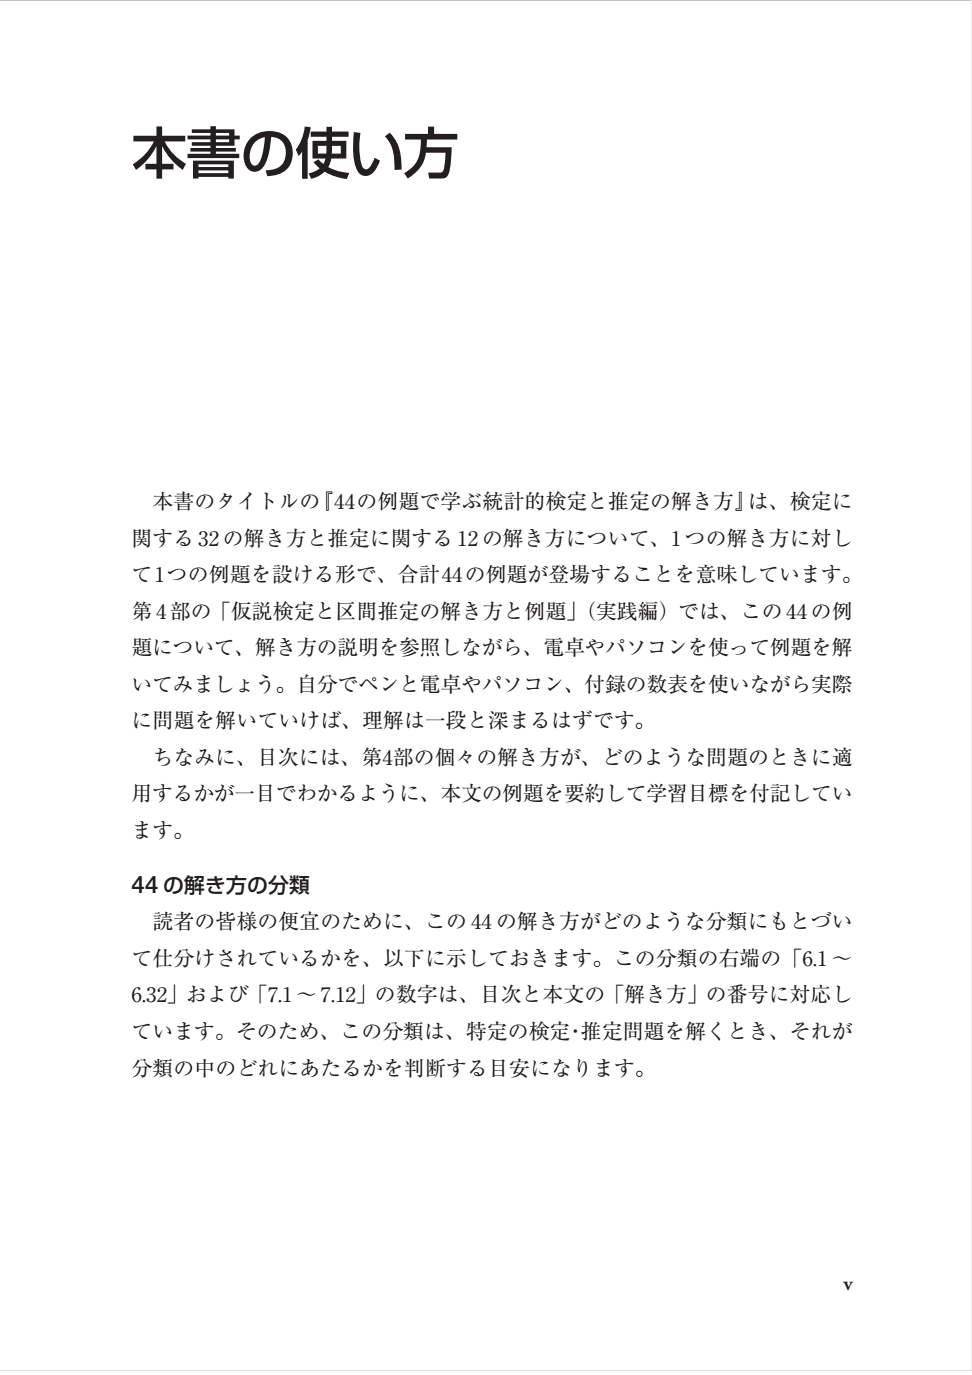

In [20]:
time.sleep(4)
pyautogui.screenshot('test.png', region=(994,39, 1966-994, 1414-39))

In [34]:
from glob import glob

In [35]:
imagelist = glob('./stock/*.png')

In [36]:
imagelist.sort()

In [37]:
imagelist

['./stock/test0000.png',
 './stock/test0001.png',
 './stock/test0002.png',
 './stock/test0003.png',
 './stock/test0004.png',
 './stock/test0005.png',
 './stock/test0006.png',
 './stock/test0007.png',
 './stock/test0008.png',
 './stock/test0009.png',
 './stock/test0010.png',
 './stock/test0011.png',
 './stock/test0012.png',
 './stock/test0013.png',
 './stock/test0014.png',
 './stock/test0015.png',
 './stock/test0016.png',
 './stock/test0017.png',
 './stock/test0018.png',
 './stock/test0019.png',
 './stock/test0020.png',
 './stock/test0021.png',
 './stock/test0022.png',
 './stock/test0023.png',
 './stock/test0024.png',
 './stock/test0025.png',
 './stock/test0026.png',
 './stock/test0027.png',
 './stock/test0028.png',
 './stock/test0029.png',
 './stock/test0030.png',
 './stock/test0031.png',
 './stock/test0032.png',
 './stock/test0033.png',
 './stock/test0034.png',
 './stock/test0035.png',
 './stock/test0036.png',
 './stock/test0037.png',
 './stock/test0038.png',
 './stock/test0039.png',


In [47]:
!pwd

/Users/anosillus/Google Drive/Work/okinawa-celler/kindle2pdf


In [9]:
from fpdf import FPDF
pdf = FPDF()
# imagelist is the list with all image filenames
i = 1
for image in imagelist:
    i += 1
    print(i)
    pdf.add_page()
    pdf.image(image)
pdf.output("inga.pdf", "F")

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


''

In [38]:
!mkdir test

In [14]:
?pdf.output

Signature: pdf.output(name='', dest='')
Docstring: Output PDF to some destination
File:      /opt/conda/envs/python36/lib/python3.6/site-packages/fpdf/fpdf.py
Type:      method
